<a href="https://colab.research.google.com/github/farzin23i/PyML-SpringSchool2021/blob/main/Workshop1/PMLSC13_210408.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To Chllenge yourself you can try to deal with this beautiful dataset: <br>
https://www.kaggle.com/ikarus777/best-artworks-of-all-time/code <br>

Try not to use the .csv file there and make one yourself. Your DataFrame should be used to read images from various folders.

# Intro

## os tuto <br>
https://www.tutorialsteacher.com/python/os-module

## glob tuto<br>
https://docs.python.org/3/library/glob.html

## Matplotlib / Pylab Short tuto

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
x= np.arange (10)

Text(0.5, 0, 'x')

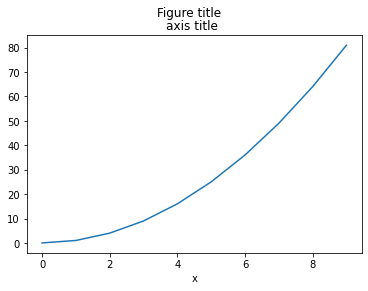

In [ ]:
# using matplotlib in Functional way
plt.plot (x, x**2)
plt.suptitle ('Figure title')
plt.title ('axis title ')

plt.xlabel ('x')

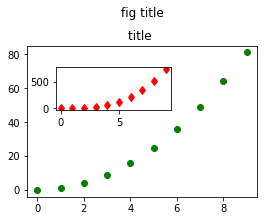

In [ ]:
# using matplotlib in Object Oriented way
fig1= plt.figure (figsize=[4,3])
ax = fig1.add_axes ([.1, .1, .8, .7])

fig1.suptitle ('fig title')
ax.set_title ('title ')

ax1 = fig1.add_axes ([.2, .5, .4, .2])

ax.plot(x, x**2, 'go')
ax1.plot(x, x**3, 'rd')

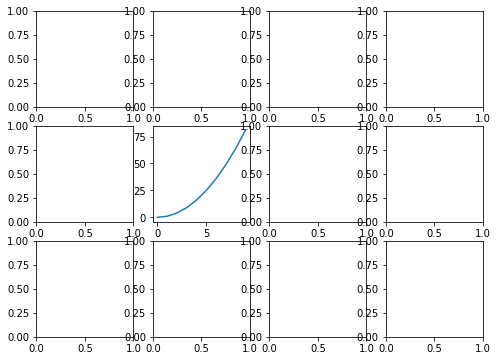

In [ ]:
# subplots
fig2, axes = plt.subplots (3,4, figsize= [8,6])
axes [1,1].plot (x, x**2)

# Bring the dataset

In [ ]:
import os 
import glob

In [ ]:
%cd /content/drive/MyDrive/PYMLSpringSchool/pmlsc_WorkShop1

/content/drive/MyDrive/PYMLSpringSchool/pmlsc_WorkShop1


In [ ]:
!pwd

/content/drive/MyDrive/PYMLSpringSchool/pmlsc_WorkShop1


In [ ]:
if not os.path.isdir('dogs-vs-cats'):
    os.makedirs('dogs-vs-cats')
%cd dogs-vs-cats

/content/drive/MyDrive/PYMLSpringSchool/pmlsc_WorkShop1/dogs-vs-cats


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ikarus777/best-artworks-of-all-time

In [ ]:
!kaggle competitions download -c dogs-vs-cats

In [ ]:
!unzip train.zip 

In [ ]:
!pwd

/content/drive/MyDrive/PYMLSpringSchool/pmlsc_WorkShop1/dogs-vs-cats


In [ ]:
!ls

kaggle.json  sampleSubmission.csv  test1.zip  train  train.zip


# Let's take a look at the data:


In [ ]:
os.listdir ()

['kaggle.json', 'train.zip', 'sampleSubmission.csv', 'test1.zip', 'train']

In [ ]:
len(os.listdir ('train'))

25000

In [ ]:
os.listdir ('train')[:10]

['cat.912.jpg',
 'cat.9089.jpg',
 'cat.9118.jpg',
 'cat.9079.jpg',
 'cat.9098.jpg',
 'cat.9119.jpg',
 'cat.9100.jpg',
 'cat.9083.jpg',
 'cat.9117.jpg',
 'cat.9093.jpg']

In [ ]:
len(glob.glob('**/*.jpg'))

25000

In [ ]:
ncats = len(glob.glob('**/cat*'))
ndogs = len(glob.glob('**/dog*'))

print (f'There are {ncats} images of cats and {ndogs} dogs in the dataset')

There are 12500 images of cats and 12500 dogs in the dataset


## Make a DataFrame based on the data

In [ ]:
!pwd

/content/drive/MyDrive/PYMLSpringSchool/pmlsc_WorkShop1


In [ ]:
%cd /content/drive/MyDrive/PYMLSpringSchool/pmlsc_WorkShop1/dogs-vs-cats

/content/drive/MyDrive/PYMLSpringSchool/pmlsc_WorkShop1/dogs-vs-cats


In [ ]:
!ls

kaggle.json  sampleSubmission.csv  test1.zip  train  train.zip


In [ ]:
filenames= os.listdir('train')
filenames[1].split('.')[0]

'cat'

In [ ]:
filenames= os.listdir('train')

categories= []
for i, nm in enumerate(filenames):
    # print (i, filenames[i])
    categories.append(filenames[i].split('.')[0])
np.unique(categories)

array(['cat', 'dog'], dtype='<U3')

In [ ]:
df = pd.DataFrame ({
    'filename':filenames,
    'category':categories
})

df.tail ()

,filename,category
24995,dog.10850.jpg,dog
24996,dog.10910.jpg,dog
24997,dog.10906.jpg,dog
24998,dog.10917.jpg,dog
24999,dog.10912.jpg,dog


In [ ]:
df.to_csv ('/content/drive/MyDrive/PYMLSpringSchool/pmlsc_WorkShop1/dogs-vs-cats.csv', index= False)

In [ ]:
df1= df.set_index ('filename')

In [ ]:
rnd = np.random.choice(filenames)

df1.loc[rnd].values

array(['dog'], dtype=object)

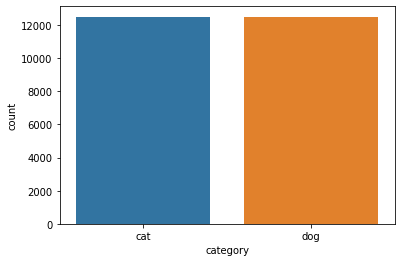

In [ ]:
import seaborn as sns
sns.countplot (data=df, x='category')

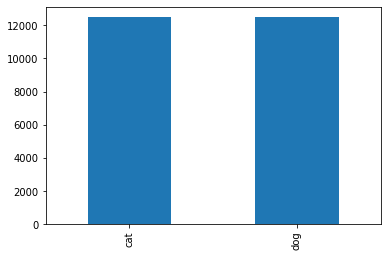

In [ ]:
# We can also use pandas to plot 
df['category'].value_counts().plot.bar()

## Load images using matplotlib

at first let's have a try to find a random image and read its category from the DataFrame


In [ ]:
rnd = np.random.choice(filenames)
rnd

'cat.9889.jpg'

In [ ]:
df['filename']==rnd

0        False
1        False
2        False
3        False
4        False
         ...  
24995    False
24996    False
24997    False
24998    False
24999    False
Name: filename, Length: 25000, dtype: bool

In [ ]:
df_rnd = df[df['filename']==rnd]
df_rnd['category'].values

array(['dog'], dtype=object)

In [ ]:
the_title = df_rnd['category'].values[0]
the_title

'dog'

In [ ]:
# All of these in one line:
df[df['filename']==rnd]['category'].values[0]

'dog'

we will use this to the title of the loaded image 


In [ ]:
# Or in this case we can use the file name to find the categoty 
rnd.split('.')[0]

'dog'

([], <a list of 0 Text major ticklabel objects>)

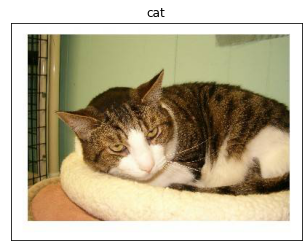

In [ ]:
rnd = np.random.choice(filenames)
plt.imshow (plt.imread(f'train/{rnd}'))

# plt.title (rnd.split('.')[0])         # in an alternative way
plt.title (df[df['filename']==rnd]['category'].values[0])


plt.xticks([])
plt.yticks([])

Text(0.5, 0.98, 'Some Example images from data')

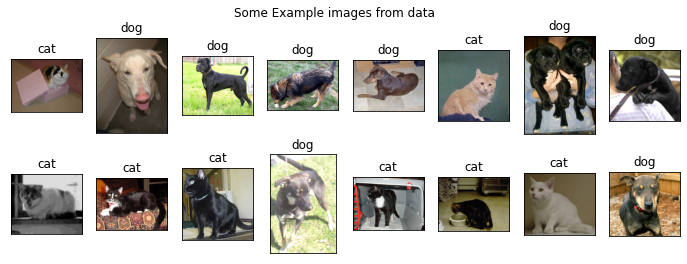

In [ ]:
# Have a look on a sample bunch of images:
fig, ax = plt.subplots (2, 8, figsize=[12,4])

for i in range (2):
    for j in range(8):
        rnd = np.random.choice(filenames)
        ax[i,j].imshow (plt.imread(f'train/{rnd}'))
        ax[i,j].set_title (df[df['filename']==rnd]['category'].values[0])

        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

fig.suptitle ('Some Example images from data')

# work with generators

In [ ]:
type(range (10))

range

In [ ]:
np.arange (10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
def gen (x):
    for i in range (x):
        yield i, i**2, i**2

In [ ]:
next(gen(10))

(0, 0, 0)

In [ ]:
for i in gen(10):
    print (i)

(0, 0, 0)
(1, 1, 1)
(2, 4, 4)
(3, 9, 9)
(4, 16, 16)
(5, 25, 25)
(6, 36, 36)
(7, 49, 49)
(8, 64, 64)
(9, 81, 81)


In [ ]:
from keras.preprocessing.image import load_img

In [ ]:
def img_gen ():
    samples = np.random.choice (filenames, size=10)
    for sample in samples:
        image = load_img ('train/'+sample)
        yield image

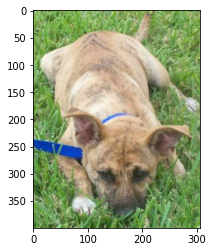

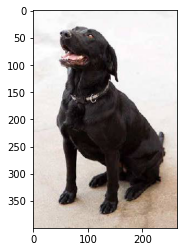

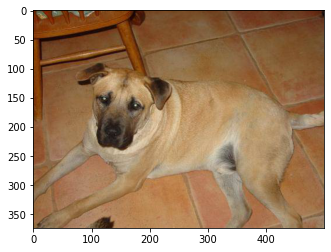

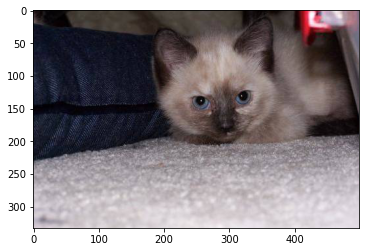

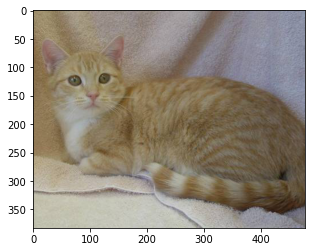

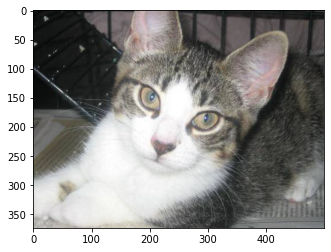

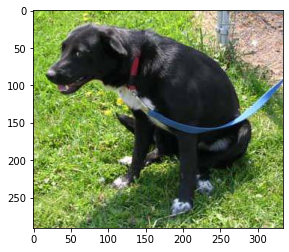

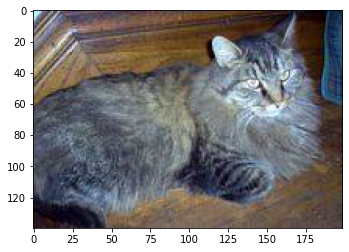

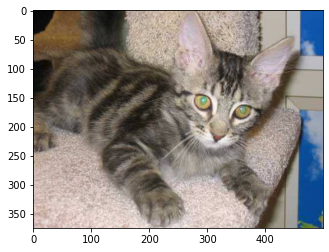

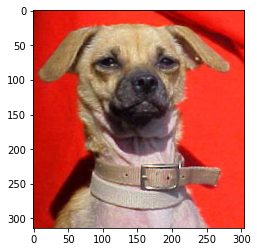

In [ ]:
for img in img_gen():
    plt.imshow (img)
    plt.show ()

## Use the generator of Keras